<a href="https://colab.research.google.com/github/yuyehara/IS-GEO2022_Angeve/blob/main/clippingRaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rioxarray
!pip install geopandas
!pip install earthpy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 1.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.3 MB 10.1 MB/s 
     |████████████████████████████████| 19.3 MB 1.4 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=19941c183eb9518a6f1fa9953bc5f78d88c61eb7eb5e2797618f2f854b15a732
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 35.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simpl

In [2]:
# Original code ref.: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/
# import libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd

import earthpy as et
import earthpy.plot as ep

In [4]:
# Prettier plotting with seaborn
sns.set(font_scale=1.5)

In [6]:
# get raster
DJI_0339_ras = rxr.open_rasterio("/content/drive/MyDrive/IS-GEO-22/DJI_0339.JPG")

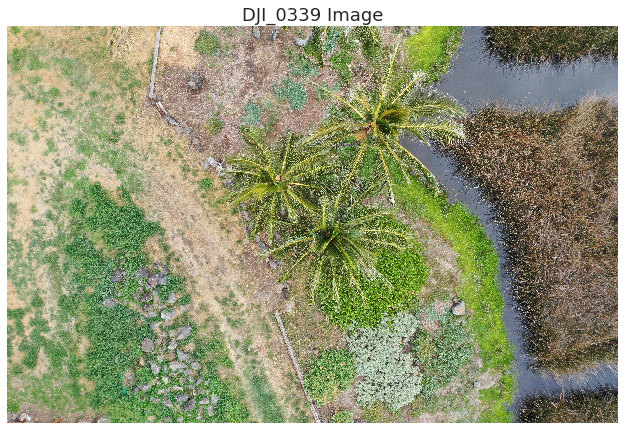

In [11]:
# plot raster
f, ax = plt.subplots(figsize=(10.944, 7.296))
DJI_0339_ras.plot.imshow()
ax.set(title="DJI_0339 Image")

ax.set_axis_off()
plt.show()

In [12]:
# get vector using geopanda
poly_palm = gpd.read_file("/content/drive/MyDrive/IS-GEO-22/palm_0339.shp")

In [13]:
# check the coorinate reference system (crs)
rasCrs = DJI_0339_ras.crs
polyCrs = poly_palm.crs

print("DJI_0339: ", rasCrs)
print("Palm_0339: ", polyCrs)

AttributeError: ignored